In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/home/siu856533724/code/source-code/Social-Networks/Trend-Prediction/DataSet/csv/reddit_emotions.csv", encoding='utf8')

In [5]:
df.shape

(84041, 3)

In [10]:
labels = list(df.label.unique())
len(labels)

28

In [11]:
one_hot_encode = []
for i in range(df.shape[0]):
    set_zeros = [0]*len(labels)
    cls = df.iloc[i, 2]
    idx = labels.index(cls)
    # print(cls)
    set_zeros[idx] = 1
    one_hot_encode.append(set_zeros)

In [15]:
text_list = df.text.values.tolist()

In [21]:
import numpy as np
df1 = pd.DataFrame(np.column_stack([one_hot_encode]), 
                               columns=labels)

In [22]:
df_new = pd.concat([df, df1], axis=1)

In [24]:
df_new.head()

,Unnamed: 0,text,label,disappointment,excitement,confusion,approval,gratitude,anger,disgust,...,caring,grief,optimism,embarrassment,pride,joy,relief,fear,remorse,nervousness
0,0,Worst ending ever! I won't spoil it but this o...,disappointment,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Happy cake day u/sneakpeekbot!,excitement,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,Was he rejected because of his methodology or ...,confusion,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,"thanks, I agree",approval,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,"thanks, I agree",gratitude,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df_new = df_new.drop(columns=['Unnamed: 0'])

In [31]:
df_new.to_csv("/home/siu856533724/code/source-code/Social-Networks/Trend-Prediction/DataSet/csv/reddit_emotions_processed.csv")

## Trend Data Pre-Processing

In [27]:
import pandas as pd
df1 = pd.read_csv("/home/siu856533724/code/source-code/Social-Networks/Trend-Prediction/DataSet/csv/hate_offensive_neither_Tweet_data.csv", encoding="utf8")
df2 = pd.read_csv("/home/siu856533724/code/source-code/Social-Networks/Trend-Prediction/DataSet/csv/insult_tweets_2014_to_2021.csv", encoding="utf8")

In [28]:
from utils.preprocessing import get_clean_dataset
# df1 = get_clean_dataset(df1)
df1.head()
df1.drop(['Unnamed: 0', 'count'], axis=1, inplace=True)

In [29]:
ls = list(df1.iloc[3][['hate', 'offensive', 'neither']])

In [30]:
from statistics import mean

for i in range(df1.shape[0]):
    ls = list(df1.iloc[i][['hate', 'offensive', 'neither']])
    mn = int(mean(ls))
    for j, val in enumerate(ls):
        if val >= mn:
            df1.iloc[i, j] = 1
        else:
            df1.iloc[i, j] = 0

df1.head()

,hate,offensive,neither,class,text
0,0,0,1,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,0,1,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,0,1,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,0,1,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,0,1,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [31]:
df1.drop('class', axis=1, inplace=True)

In [33]:
df2.head()

,Unnamed: 0,date,target,insult,text
0,1,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ..."
1,2,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ..."
2,3,2015-06-16,politicians,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...
3,4,2015-06-24,ben-cardin,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...
4,5,2015-06-24,neil-young,total hypocrite,"For the nonbeliever, here is a photo of @Neily..."


In [36]:
df2.drop(['Unnamed: 0', 'date', 'target'], axis=1, inplace=True)

In [37]:
df2.head()

,insult,text
0,fool,"Can you believe this fool, Dr. Thomas Frieden ..."
1,DOPE,"Can you believe this fool, Dr. Thomas Frieden ..."
2,all talk and no action,Big time in U.S. today - MAKE AMERICA GREAT AG...
3,It's politicians like Cardin that have destroy...,Politician @SenatorCardin didn't like that I s...
4,total hypocrite,"For the nonbeliever, here is a photo of @Neily..."


In [38]:
df2.to_csv("/home/siu856533724/code/source-code/Social-Networks/Trend-Prediction/DataSet/csv/insult_tweets_2014_to_2021_processed.csv")

## Tread Data Processing and combining into one File

In [1]:
import pandas as pd
# https://www.kaggle.com/competitions/jigsaw-unintended-bias-in-toxicity-classification/data
df1 = pd.read_csv('/home/siu856533724/code/source-code/Social-Networks/Trend-Prediction/DataSet/trend_data/trend_data_6_class.csv')
# https://www.kaggle.com/datasets/mrmorj/hate-speech-and-offensive-language-dataset
df2 = pd.read_csv('/home/siu856533724/code/source-code/Social-Networks/Trend-Prediction/DataSet/trend_data/hate_offensive_neither_Tweet_processed.csv')

In [2]:
df1.shape

(159571, 8)

In [3]:
df1.head()

,id,text,toxic,severe_toxic,obscene,threat,insult,hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [41]:
df1.drop(['id', 'severe_toxic'], axis=1, inplace=True)
df2.drop('Unnamed: 0', axis=1, inplace=True)

In [42]:
df = pd.concat([df1, df2], axis=0)

In [43]:
import numpy as np
df.replace(np.nan, 0, inplace=True)
df.head()

,text,toxic,obscene,threat,insult,hate,offensive,neither
0,Explanation\nWhy the edits made under my usern...,0.0,0.0,0.0,0.0,0,0.0,0.0
1,D'aww! He matches this background colour I'm s...,0.0,0.0,0.0,0.0,0,0.0,0.0
2,"Hey man, I'm really not trying to edit war. It...",0.0,0.0,0.0,0.0,0,0.0,0.0
3,"""\nMore\nI can't make any real suggestions on ...",0.0,0.0,0.0,0.0,0,0.0,0.0
4,"You, sir, are my hero. Any chance you remember...",0.0,0.0,0.0,0.0,0,0.0,0.0


In [44]:
dff = df.query('insult == 1.0')
dff.shape

(7877, 8)

In [45]:
dff = df.query('offensive == 1.0')
dff.shape

(21235, 8)

In [47]:
dff = df.query('insult == 1.0 & offensive == 1.0')
dff.shape

(0, 8)

In [48]:
df.head()

,text,toxic,obscene,threat,insult,hate,offensive,neither
0,Explanation\nWhy the edits made under my usern...,0.0,0.0,0.0,0.0,0,0.0,0.0
1,D'aww! He matches this background colour I'm s...,0.0,0.0,0.0,0.0,0,0.0,0.0
2,"Hey man, I'm really not trying to edit war. It...",0.0,0.0,0.0,0.0,0,0.0,0.0
3,"""\nMore\nI can't make any real suggestions on ...",0.0,0.0,0.0,0.0,0,0.0,0.0
4,"You, sir, are my hero. Any chance you remember...",0.0,0.0,0.0,0.0,0,0.0,0.0


In [49]:
df['offensive'] = df.apply(
    lambda row: (row.insult or row.offensive), axis=1
)

In [50]:
dff = df.query('offensive == 1.0')
dff.shape

(29112, 8)

In [51]:
df.drop(['insult'], axis=1, inplace=True)

In [52]:
df.head()

,text,toxic,obscene,threat,hate,offensive,neither
0,Explanation\nWhy the edits made under my usern...,0.0,0.0,0.0,0,0.0,0.0
1,D'aww! He matches this background colour I'm s...,0.0,0.0,0.0,0,0.0,0.0
2,"Hey man, I'm really not trying to edit war. It...",0.0,0.0,0.0,0,0.0,0.0
3,"""\nMore\nI can't make any real suggestions on ...",0.0,0.0,0.0,0,0.0,0.0
4,"You, sir, are my hero. Any chance you remember...",0.0,0.0,0.0,0,0.0,0.0


In [54]:
df.rename(columns={'neither': 'neutral'}, inplace=True)

In [55]:
df.head()

,text,toxic,obscene,threat,hate,offensive,neutral
0,Explanation\nWhy the edits made under my usern...,0.0,0.0,0.0,0,0.0,0.0
1,D'aww! He matches this background colour I'm s...,0.0,0.0,0.0,0,0.0,0.0
2,"Hey man, I'm really not trying to edit war. It...",0.0,0.0,0.0,0,0.0,0.0
3,"""\nMore\nI can't make any real suggestions on ...",0.0,0.0,0.0,0,0.0,0.0
4,"You, sir, are my hero. Any chance you remember...",0.0,0.0,0.0,0,0.0,0.0


In [56]:
df1 = df.loc[(df['toxic'] > 0) | (df['obscene'] > 0) \
       | (df['threat'] > 0) | (df['hate'] > 0) | (df['offensive'] > 0) | (df['neutral'] > 0)]

In [57]:
df1.head()

,text,toxic,obscene,threat,hate,offensive,neutral
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1.0,1.0,0.0,0,1.0,0.0
12,Hey... what is it..\n@ | talk .\nWhat is it......,1.0,0.0,0.0,0,0.0,0.0
16,"Bye! \n\nDon't look, come or think of comming ...",1.0,0.0,0.0,0,0.0,0.0
42,You are gay or antisemmitian? \n\nArchangel WH...,1.0,1.0,0.0,1,1.0,0.0
43,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1.0,1.0,0.0,0,1.0,0.0


In [58]:
df1.shape

(41008, 7)

In [59]:
df1.to_csv("/home/siu856533724/code/source-code/Social-Networks/Trend-Prediction/DataSet/csv/trend_data_6_class_processed.csv")

## Getting Approval data from the emotion datasets

In [156]:
import pandas as pd
df1 = pd.read_csv("/home/siu856533724/code/source-code/Social-Networks/Trend-Prediction/DataSet/csv/goemotions_1.csv", encoding='utf8')
df2 = pd.read_csv("/home/siu856533724/code/source-code/Social-Networks/Trend-Prediction/DataSet/csv/goemotions_2.csv", encoding='utf8')
df3 = pd.read_csv("/home/siu856533724/code/source-code/Social-Networks/Trend-Prediction/DataSet/csv/goemotions_3.csv", encoding='utf8')
df4 = pd.read_csv("/home/siu856533724/code/source-code/Social-Networks/Trend-Prediction/DataSet/csv/reddit_emotions_processed.csv", encoding='utf8')

In [157]:
df = pd.concat([df1, df2, df3, df4], axis=0)

In [158]:
df_new = df[['text', 'admiration', 'approval', 'gratitude', 'realization']]

In [159]:
df_new.head()

,text,admiration,approval,gratitude,realization
0,That game hurt.,0,0,0,0
1,>sexuality shouldn’t be a grouping category I...,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",0,0,0,0
3,Man I love reddit.,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",0,0,0,0


In [160]:
df_new['approval'].value_counts()

0    271739
1     23527
Name: approval, dtype: int64

In [161]:
df1 = df_new.loc[(df_new['admiration'] > 0) | (df_new['approval'] > 0) | (df_new['gratitude'] > 0) | (df_new['realization'] > 0)]

In [162]:
df1.head()

,text,admiration,approval,gratitude,realization
5,Right? Considering it’s such an important docu...,0,0,1,0
15,"I appreciate it, that's good to know. I hope I...",1,0,1,0
17,Well then I’d say you have a pretty good chanc...,0,0,0,1
18,Pretty much every Punjabi dude I've met.,1,0,0,0
23,Now I'm wondering on what I've been missing ou...,0,0,1,0


In [163]:
df1.shape

(69201, 5)

In [166]:
df1['approval_new'] = df1.apply(
    lambda row: (row.approval or row.admiration or row.gratitude or row.realization), axis=1)

/tmp/ipykernel_1804306/3141264499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['approval_new'] = df1.apply(


In [167]:
df1.head()

,text,admiration,approval,gratitude,realization,approval_new
5,Right? Considering it’s such an important docu...,0,0,1,0,1
15,"I appreciate it, that's good to know. I hope I...",1,0,1,0,1
17,Well then I’d say you have a pretty good chanc...,0,0,0,1,1
18,Pretty much every Punjabi dude I've met.,1,0,0,0,1
23,Now I'm wondering on what I've been missing ou...,0,0,1,0,1


In [168]:
df1['approval_new'].value_counts()

1    69201
Name: approval_new, dtype: int64

In [169]:
df1.to_csv("/home/siu856533724/code/source-code/Social-Networks/Trend-Prediction/DataSet/trend_data/trend_data_approval.csv")

## Logging Process

In [59]:
import re
regexp = "/^[0-9]*(\.[0-9]{0,2})?$/"
                  
with open("/home/siu856533724/code/source-code/Social-Networks/Trend-Prediction/Main-Implementation/logs/classification_report.txt", "r") as f:
    lines = f.readlines()
    mp = {}
    for line in lines:
        line = line.strip().split("     ")
        print(line)
        if len(line) == 1 and line[0] != '' and 'precision' not in line[0] and '----------' not in line[0] and '=======' not in line[0]:
            mp[line[0]] = list()
            key = line[0]
        elif line[0] == 'micro avg':
            temp_line = line[1:4]
            for temp in temp_line:
                temp = list(re.findall('\d+\.\d+', temp))
                print("Number: ", temp[0])
                mp[key].append(temp[0])
        elif line[0] == 'macro avg':
            temp_line = line[1:4]
            for temp in temp_line:
                temp = list(re.findall('\d+\.\d+', temp))
                print("Number: ", temp[0])
                mp[key].append(temp[0])
        

['LR-CC']
['-------------------------------------------------------']
['precision    recall  f1-score   support']
['']
['0', '  0.82', ' 0.96', ' 0.89', '13853']
['1', '  0.00', ' 0.00', ' 0.00', ' 3107']
['2', '  0.00', ' 0.00', ' 0.00', ' 1707']
['3', '  0.00', ' 0.00', ' 0.00', '  100']
['4', '  0.00', ' 0.00', ' 0.00', ' 1162']
['5', '  0.72', ' 0.71', ' 0.71', ' 5816']
['6', '  0.00', ' 0.00', ' 0.00', ' 1092']
['']
['micro avg', '  0.79', ' 0.65', ' 0.72', '26837']
Number:  0.79
Number:  0.65
Number:  0.72
['macro avg', '  0.22', ' 0.24', ' 0.23', '26837']
Number:  0.22
Number:  0.24
Number:  0.23
['weighted avg', '  0.58', ' 0.65', ' 0.61', '26837']
['samples avg', '  0.79', ' 0.74', ' 0.75', '26837']
['']
['=======================================================']
['LR-LP']
['-------------------------------------------------------']
['precision    recall  f1-score   support']
['']
['0', '  0.83', ' 0.97', ' 0.89', '13853']
['1', '  0.57', ' 0.06', ' 0.11', ' 3107']
['2', '  0.5

In [60]:
keys = list(mp.keys())
keys.sort()
print(keys)
rows = []
for key in keys:
    lst = []
    lst.append(key)
    for k in list(mp[key]):
        lst.append(k)
    # lst = list(mp[key])
    rows.append(lst)
rows

['Bagging-ORC', 'Boosting-ORC', 'DecisionTree', 'LR-CC', 'LR-LP', 'MultiNB-BR', 'MultiNB-CC', 'MultiNB-LP', 'RF', 'SVC-LP', 'SVC-MOC', 'SVC-ORC', 'XGB-MOC', 'XGB-ORC']


[['Bagging-ORC', '0.86', '0.70', '0.77', '0.58', '0.33', '0.38'],
 ['Boosting-ORC', '0.85', '0.69', '0.76', '0.55', '0.32', '0.35'],
 ['DecisionTree', '0.73', '0.73', '0.73', '0.43', '0.42', '0.42'],
 ['LR-CC', '0.79', '0.65', '0.72', '0.22', '0.24', '0.23'],
 ['LR-LP', '0.80', '0.67', '0.73', '0.38', '0.26', '0.26'],
 ['MultiNB-BR', '0.82', '0.57', '0.68', '0.23', '0.19', '0.20'],
 ['MultiNB-CC', '0.78', '0.62', '0.69', '0.40', '0.26', '0.29'],
 ['MultiNB-LP', '0.72', '0.59', '0.65', '0.22', '0.19', '0.19'],
 ['RF', '0.88', '0.70', '0.78', '0.68', '0.32', '0.36'],
 ['SVC-LP', '0.79', '0.65', '0.71', '0.37', '0.24', '0.23'],
 ['SVC-MOC', '0.86', '0.63', '0.72', '0.46', '0.24', '0.25'],
 ['SVC-ORC', '0.86', '0.63', '0.72', '0.46', '0.24', '0.25'],
 ['XGB-MOC', '0.86', '0.72', '0.78', '0.64', '0.37', '0.42'],
 ['XGB-ORC', '0.86', '0.73', '0.79', '0.65', '0.38', '0.44']]

In [62]:
import pandas as pd
df1 = pd.DataFrame(rows, columns=['Models', 'Precision','Recall', 'F1','Precision','Recall', 'F1'])
df1.head(14)

,Models,Precision,Recall,F1,Precision,Recall,F1
0,Bagging-ORC,0.86,0.70,0.77,0.58,0.33,0.38
1,Boosting-ORC,0.85,0.69,0.76,0.55,0.32,0.35
2,DecisionTree,0.73,0.73,0.73,0.43,0.42,0.42
3,LR-CC,0.79,0.65,0.72,0.22,0.24,0.23
4,LR-LP,0.80,0.67,0.73,0.38,0.26,0.26
5,MultiNB-BR,0.82,0.57,0.68,0.23,0.19,0.20
6,MultiNB-CC,0.78,0.62,0.69,0.40,0.26,0.29
7,MultiNB-LP,0.72,0.59,0.65,0.22,0.19,0.19
8,RF,0.88,0.70,0.78,0.68,0.32,0.36
9,SVC-LP,0.79,0.65,0.71,0.37,0.24,0.23


In [63]:
df2 = pd.read_csv('/home/siu856533724/code/source-code/Social-Networks/Trend-Prediction/Main-Implementation/logs/model_trend_scores.csv')

df2.drop('Unnamed: 0', axis=1, inplace=True)


In [67]:
df2 = df2.round(4)
df2= df2[0:14]
df2.head(14)

,Model,"('Approval',)","('toxic',)","('obscene',)","('threat',)","('hate',)","('offensive',)","('neutral',)"
0,Bagging-ORC,0.6981,0.1591,0.0668,0.0052,0.0294,0.0848,0.0042
1,Boosting-ORC,0.6981,0.1591,0.0668,0.0052,0.0294,0.0848,0.0042
2,DecisionTree,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,LR-CC,0.5914,0.1523,0.0536,0.0064,0.0526,0.2424,0.0875
4,LR-LP,0.6487,0.0435,0.0210,0.0037,0.0266,0.0639,0.0281
5,MultiNB-BR,0.6874,0.0888,0.0406,0.0048,0.0441,0.1983,0.0776
6,MultiNB-CC,0.6598,0.1125,0.0544,0.0035,0.0422,0.2182,0.0468
7,MultiNB-LP,0.6578,0.0004,0.0001,0.0001,0.0003,0.0002,0.0004
8,RF,0.6670,0.1216,0.0602,0.0041,0.0471,0.2261,0.0524
9,SVC-LP,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [68]:
df3 = df2.drop('Model', axis=1)
df3.head()

,"('Approval',)","('toxic',)","('obscene',)","('threat',)","('hate',)","('offensive',)","('neutral',)"
0,0.6981,0.1591,0.0668,0.0052,0.0294,0.0848,0.0042
1,0.6981,0.1591,0.0668,0.0052,0.0294,0.0848,0.0042
2,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.5914,0.1523,0.0536,0.0064,0.0526,0.2424,0.0875
4,0.6487,0.0435,0.0210,0.0037,0.0266,0.0639,0.0281


In [69]:
df = pd.concat([df1, df3], axis=1)
df.head(15)

,Models,Precision,Recall,F1,Precision,Recall,F1,"('Approval',)","('toxic',)","('obscene',)","('threat',)","('hate',)","('offensive',)","('neutral',)"
0,Bagging-ORC,0.86,0.70,0.77,0.58,0.33,0.38,0.6981,0.1591,0.0668,0.0052,0.0294,0.0848,0.0042
1,Boosting-ORC,0.85,0.69,0.76,0.55,0.32,0.35,0.6981,0.1591,0.0668,0.0052,0.0294,0.0848,0.0042
2,DecisionTree,0.73,0.73,0.73,0.43,0.42,0.42,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,LR-CC,0.79,0.65,0.72,0.22,0.24,0.23,0.5914,0.1523,0.0536,0.0064,0.0526,0.2424,0.0875
4,LR-LP,0.80,0.67,0.73,0.38,0.26,0.26,0.6487,0.0435,0.0210,0.0037,0.0266,0.0639,0.0281
5,MultiNB-BR,0.82,0.57,0.68,0.23,0.19,0.20,0.6874,0.0888,0.0406,0.0048,0.0441,0.1983,0.0776
6,MultiNB-CC,0.78,0.62,0.69,0.40,0.26,0.29,0.6598,0.1125,0.0544,0.0035,0.0422,0.2182,0.0468
7,MultiNB-LP,0.72,0.59,0.65,0.22,0.19,0.19,0.6578,0.0004,0.0001,0.0001,0.0003,0.0002,0.0004
8,RF,0.88,0.70,0.78,0.68,0.32,0.36,0.6670,0.1216,0.0602,0.0041,0.0471,0.2261,0.0524
9,SVC-LP,0.79,0.65,0.71,0.37,0.24,0.23,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [70]:
df.to_csv("/home/siu856533724/code/source-code/Social-Networks/Trend-Prediction/Main-Implementation/logs/table-3.csv")

## Plot generation

In [1]:
from utils.common_functions import get_sentiment_dict, get_emotions
sentiment_dict = get_sentiment_dict()

emotions = get_emotions().values()
def get_labels():
    labels = list(emotions)
    return labels

2023-06-20 12:15:54.719539: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-20 12:15:54.762491: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-20 12:15:55.357930: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:
positive = list(sentiment_dict['positive'])
negative = list(sentiment_dict['negative'])
ambiguous = list(sentiment_dict['ambiguous'])
neutral = list(sentiment_dict['neutral'])

def get_pos_neg_amb(df_score):
    positive_scores = df_score[positive].values.tolist()
    negative_scores = df_score[negative].values.tolist()
    ambiguous_scores = df_score[ambiguous].values.tolist()
    neutral_scores = df_score[neutral].values.tolist()
    # print(sum(positive_scores[0]))
    # print(sum(negative_scores[0]))
    # print(sum(ambiguous_scores[0]))
    lst = list()
    lst.append(sum(positive_scores[0]))
    lst.append(sum(negative_scores[0]))
    lst.append(sum(ambiguous_scores[0]))
    lst.append(sum(neutral_scores[0]))
    return lst


In [9]:
import glob
import os
import json
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

file_path = '/home/siu856533724/code/source-code/Social-Networks/Trend-Prediction/Main-Implementation/logs/trend_result/'
json_files = list(glob.glob(os.path.join(file_path, "*.json")))



sentiment_scores = []
for file in json_files:
    polarity_scores = {}
    polarity_scores['polarity'] = []
    with open(file, 'r') as f:
        json_object = json.loads(f.read())
        final_dictionary = eval(json_object)
        df1 = pd.DataFrame([final_dictionary['emotion_scores'][0]], columns=[get_labels()])
        polarity_scores['polarity'].append(get_pos_neg_amb(df1))
        df2 = pd.DataFrame([final_dictionary['emotion_scores'][1]], columns=[get_labels()])
        polarity_scores['polarity'].append(get_pos_neg_amb(df2))
        df3 = pd.DataFrame([final_dictionary['emotion_scores'][2]], columns=[get_labels()])
        polarity_scores['polarity'].append(get_pos_neg_amb(df3))
        polarity_scores['file_name'] = file
        sentiment_scores.append(polarity_scores)

In [10]:
sentiment_scores

[{'polarity': [[0.421146667868846,
    0.38512965437196023,
    0.14180855705170364,
    0.05191512070749006],
   [0.399194120171811,
    0.36145187236288556,
    0.13472925673793829,
    0.104624750727365],
   [0.40008431090896796,
    0.3627089284353054,
    0.13514261862095622,
    0.10206414203477039]],
  'file_name': '/home/siu856533724/code/source-code/Social-Networks/Trend-Prediction/Main-Implementation/logs/trend_result/fox-white-house-flew.json'},
 {'polarity': [[0.42424925886458803,
    0.38540559969254357,
    0.14101188553105948,
    0.04933325591180884],
   [0.40274187368271297,
    0.36438856336028935,
    0.13732925490832487,
    0.09554030804867271],
   [0.3973081850231741,
    0.35986260421719596,
    0.13581214720032983,
    0.10701706355930025]],
  'file_name': '/home/siu856533724/code/source-code/Social-Networks/Trend-Prediction/Main-Implementation/logs/trend_result/fox-biden-admin-confident.json'},
 {'polarity': [[0.16688536915983124,
    0.1586997955351404,
    0.

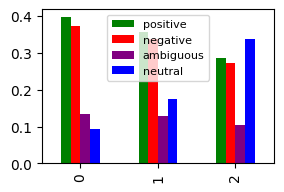

In [48]:
import pandas as pd 
import matplotlib.pyplot as plot 

# Make a data definition
_data=sentiment_scores[5]['polarity']
# Colors 
my_color =['green', 'red','purple', 'blue']
 
# Draw a multi-colored bar chart.
_df = pd.DataFrame(_data, columns=['positive', 'negative', 'ambiguous', 'neutral'])
 
_df.plot(y=['positive', 'negative', 'ambiguous', 'neutral'], 
        kind="bar",figsize=(3,2), color=my_color)

plt.legend(fontsize="8", loc ="upper center",)
# Display the plot
plot.show()

## Table 2 generation

In [84]:
import glob
import os
import json
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

file_path = '/home/siu856533724/code/source-code/Social-Networks/Trend-Prediction/Main-Implementation/logs/trend_result/'
json_files = list(glob.glob(os.path.join(file_path, "*.json")))
json_files.sort()

dict_data = {}
dict_data['nodes'] = []
dict_data['m_depth'] = []
dict_data['m_replies'] = []
dict_data['f_comments'] = []
dict_data['method'] = []


fig_trend_data = []
timestamps = []

trend_scores = []
for file in json_files:
    with open(file, 'r') as f:
        json_object = json.loads(f.read())
        final_dictionary = eval(json_object)
        trend_scores.append(final_dictionary['trend_scores'][2])
        fig_trend_data.append(final_dictionary['trend_scores'])
        timestamps.append(final_dictionary['timestamps'])
        # df1 = pd.DataFrame([final_dictionary['trend_scores'][2]], columns=trends)
        print(file)
        # print(final_dictionary['total_node'])
        # print(final_dictionary['max_depth'])
        # print(final_dictionary['max_replies'])
        # print(final_dictionary['aggregation'])
        dict_data['nodes'].append(final_dictionary['total_node'][2])
        dict_data['m_depth'].append(final_dictionary['max_depth'][2])
        dict_data['m_replies'].append(final_dictionary['max_replies'][2])
        dict_data['f_comments'].append(final_dictionary['f_level_comment'][2])
        dict_data['method'].append(final_dictionary['aggregation'])


/home/siu856533724/code/source-code/Social-Networks/Trend-Prediction/Main-Implementation/logs/trend_result/fox-biden-admin-confident_base1.json
/home/siu856533724/code/source-code/Social-Networks/Trend-Prediction/Main-Implementation/logs/trend_result/fox-biden-admin-confident_base2.json
/home/siu856533724/code/source-code/Social-Networks/Trend-Prediction/Main-Implementation/logs/trend_result/fox-democratic-la-city_base1.json
/home/siu856533724/code/source-code/Social-Networks/Trend-Prediction/Main-Implementation/logs/trend_result/fox-democratic-la-city_base2.json
/home/siu856533724/code/source-code/Social-Networks/Trend-Prediction/Main-Implementation/logs/trend_result/fox-jewish-group_base1.json
/home/siu856533724/code/source-code/Social-Networks/Trend-Prediction/Main-Implementation/logs/trend_result/fox-jewish-group_base2.json
/home/siu856533724/code/source-code/Social-Networks/Trend-Prediction/Main-Implementation/logs/trend_result/fox-target-stores-received_base1.json
/home/siu856533

In [66]:
df1 = pd.DataFrame(dict_data)
df1.head()

,nodes,m_depth,m_replies,f_comments,method
0,177,3,7,143,base1
1,177,3,7,143,base2
2,937,7,10,756,base1
3,937,7,10,756,base2
4,320,6,7,143,base1


In [71]:
trends = ['approval', 'toxic', 'obscene', 'threat', 'hate', 'offensive', 'neutral']
df2 = pd.DataFrame(trend_scores, columns=trends)
df2 = df2.round(4)
df2.head()

,approval,toxic,obscene,threat,hate,offensive,neutral
0,0.1243,0.4493,0.1146,0.0025,0.0085,0.1665,0.0278
1,0.6609,0.0838,0.0506,0.0026,0.0030,0.1281,0.0047
2,0.0400,0.1075,0.0098,0.0001,0.2409,0.3558,0.0976
3,0.7631,0.0838,0.0569,0.0026,0.0030,0.1281,0.0047
4,0.0392,0.2836,0.1558,0.0005,0.0571,0.2531,0.3729


In [72]:
df = pd.concat([df1, df2], axis=1)
df.head()

,nodes,m_depth,m_replies,f_comments,method,approval,toxic,obscene,threat,hate,offensive,neutral
0,177,3,7,143,base1,0.1243,0.4493,0.1146,0.0025,0.0085,0.1665,0.0278
1,177,3,7,143,base2,0.6609,0.0838,0.0506,0.0026,0.0030,0.1281,0.0047
2,937,7,10,756,base1,0.0400,0.1075,0.0098,0.0001,0.2409,0.3558,0.0976
3,937,7,10,756,base2,0.7631,0.0838,0.0569,0.0026,0.0030,0.1281,0.0047
4,320,6,7,143,base1,0.0392,0.2836,0.1558,0.0005,0.0571,0.2531,0.3729


In [73]:
df.to_csv("/home/siu856533724/code/source-code/Social-Networks/Trend-Prediction/Main-Implementation/logs/table-2.csv")

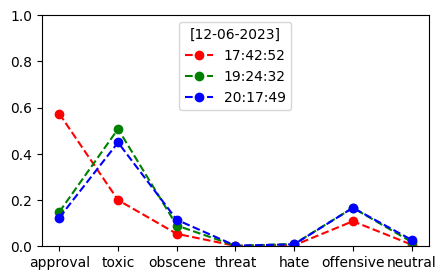

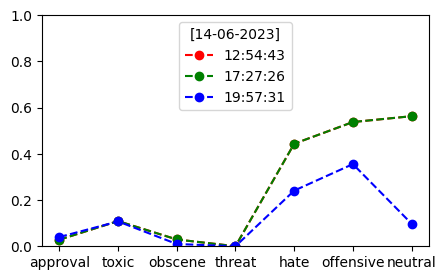

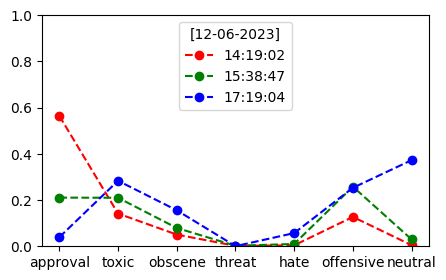

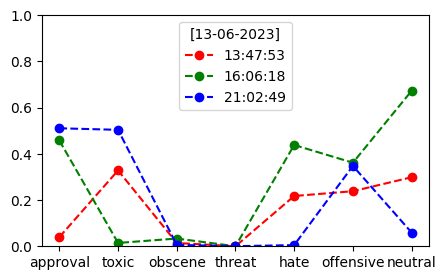

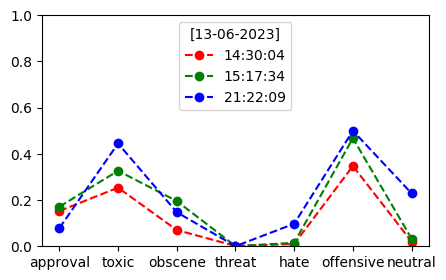

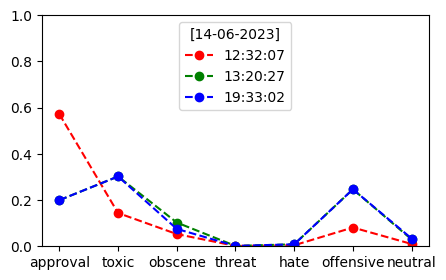

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

X = ['approval', 'toxic', 'obscene', 'threat', 'hate', 'offensive', 'neutral']
k1=np.arange(len(X))
w=0.1

for i in range(0, 12, 2):

    Y0 = fig_trend_data[i][0]
    Y1 = fig_trend_data[i][1]
    Y2 = fig_trend_data[i][2]

    time = []
    date = ''
    for t in timestamps[i]:
        t = str(t).split(' ')
        time.append(t[1])
        date = t[0]

    fig, ax = plt.subplots(figsize=(5, 3))
    ax.plot(X, Y0 , color="red", marker='o', linestyle='dashed')
    ax.plot(X, Y1 , color="green", marker='o', linestyle='dashed')
    ax.plot(X, Y2 , color="blue", marker='o', linestyle='dashed')

    plt.title('')
    ax.legend(time, fontsize="10", loc ="upper center", title=f'[{date}]')
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks()
    # plt.ylim([0,3])
    plt.ylim([0, 1.0])
